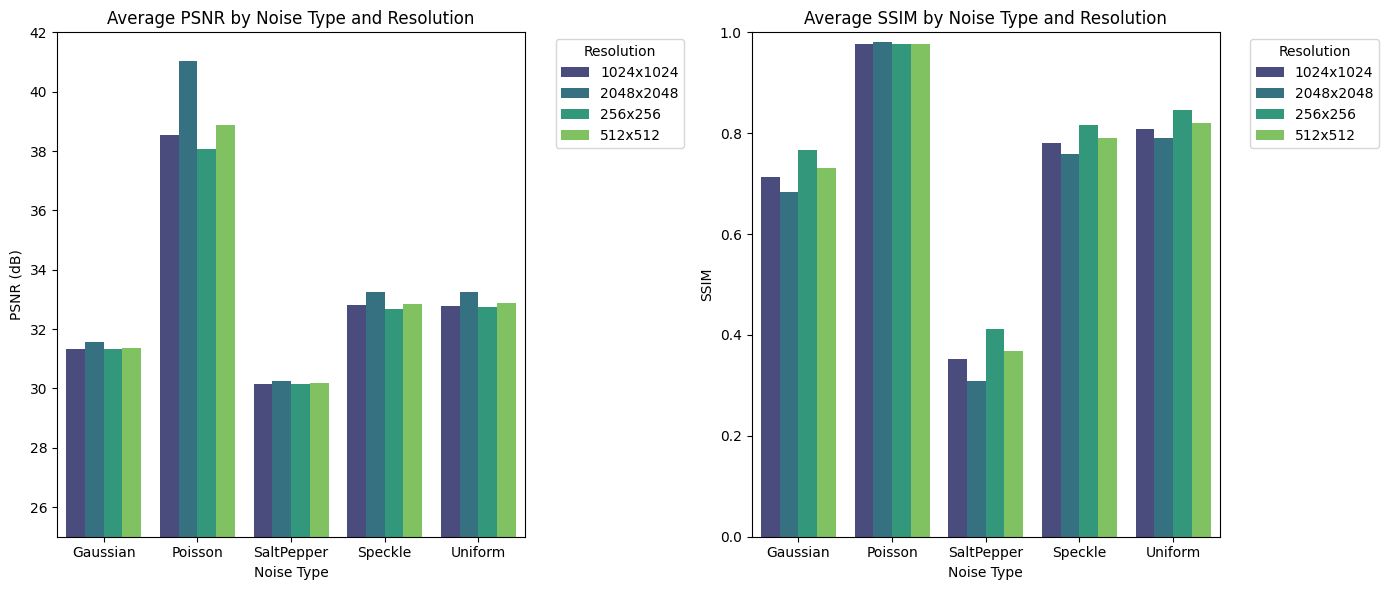

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV data
df = pd.read_csv("image_metrics.csv")

# Calculate average PSNR and SSIM for each noise type and resolution
df_avg = df.groupby(['Noise Type', 'Resolution'])[['PSNR', 'SSIM']].mean().reset_index()

# Set up the plot
plt.figure(figsize=(14, 6))

# Plot Average PSNR
plt.subplot(1, 2, 1)
sns.barplot(x='Noise Type', y='PSNR', hue='Resolution', data=df_avg, palette='viridis')
plt.title('Average PSNR by Noise Type and Resolution')
plt.ylabel('PSNR (dB)')
plt.ylim(25, 42)  # Adjust y-axis limits based on your data range
plt.legend(title='Resolution', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside

# Plot Average SSIM
plt.subplot(1, 2, 2)
sns.barplot(x='Noise Type', y='SSIM', hue='Resolution', data=df_avg, palette='viridis')
plt.title('Average SSIM by Noise Type and Resolution')
plt.ylabel('SSIM')
plt.ylim(0, 1)  # SSIM ranges from 0 to 1
plt.legend(title='Resolution', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside

# Display the plot
plt.tight_layout()
plt.show()

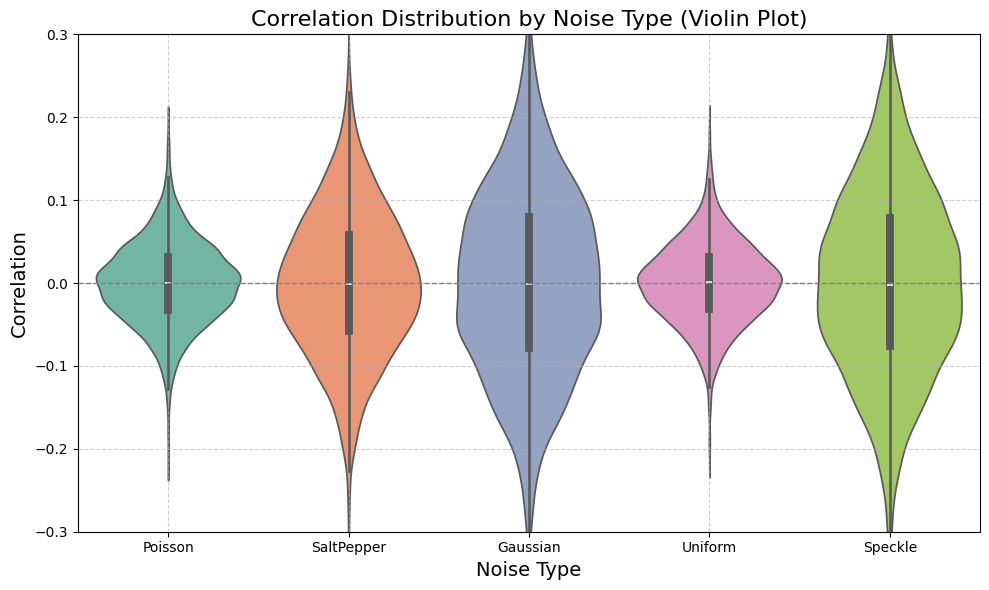

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the correct CSV file (Noisy Watermark vs. Original Watermark)
df = pd.read_csv("watermark_metrics.csv")  # Replace with your actual filename

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot Violin Plot
sns.violinplot(
    x='Noise Type', 
    y='Correlation', 
    hue='Noise Type',  # Assign x-variable to hue
    data=df, 
    palette='Set2', 
    legend=False  # Disable redundant legend
)
plt.title('Correlation Distribution by Noise Type (Violin Plot)', fontsize=16)
plt.xlabel('Noise Type', fontsize=14)
plt.ylabel('Correlation', fontsize=14)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.ylim(-0.3, 0.3)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Number of duplicate entries: 20420


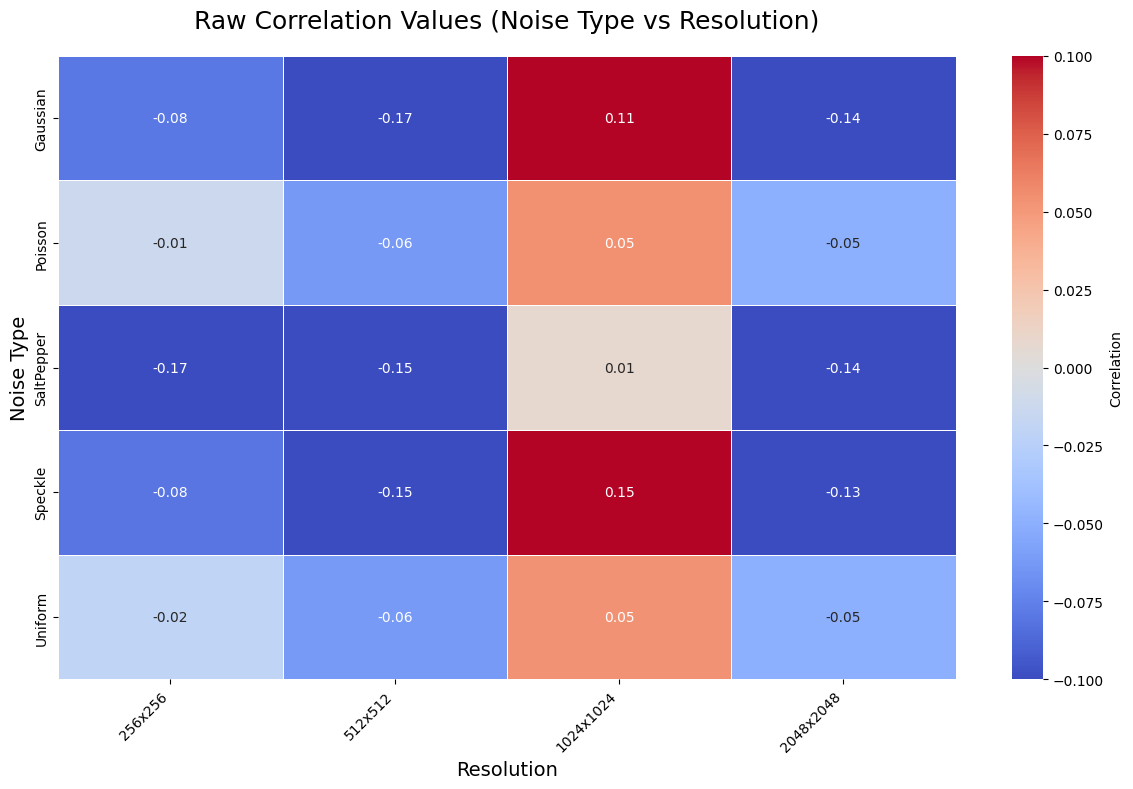

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV data (Noisy Watermark vs. Original Watermark)
df = pd.read_csv("watermark_metrics.csv")  # Replace with your CSV filename

# --- Data Preparation ---
# Check for duplicate entries
duplicates = df.duplicated(subset=['Noise Type', 'Resolution']).sum()
print(f"Number of duplicate entries: {duplicates}")

# Remove duplicates (if needed)
df = df.drop_duplicates(subset=['Noise Type', 'Resolution'])

# Pivot data without aggregation (assumes unique Noise Type-Resolution pairs)
try:
    heatmap_data = df.pivot(index='Noise Type', columns='Resolution', values='Correlation')
except ValueError:
    # Fallback to pivot_table with 'first' aggregation if duplicates exist
    heatmap_data = df.pivot_table(index='Noise Type', columns='Resolution', values='Correlation', aggfunc='first')

# Ensure resolution order
resolution_order = ['256x256', '512x512', '1024x1024', '2048x2048']
heatmap_data = heatmap_data[resolution_order]

# --- Plotting ---
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    center=0, 
    vmin=-0.1,  # Narrower range to highlight small deviations
    vmax=0.1,
    linewidths=0.5,  # Add grid lines between cells
    cbar_kws={'label': 'Correlation'}  # Improve colorbar label
)
plt.title('Raw Correlation Values (Noise Type vs Resolution)', fontsize=18, pad=20)
plt.xlabel('Resolution', fontsize=14)
plt.ylabel('Noise Type', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate resolution labels for readability
plt.tight_layout()
plt.show()